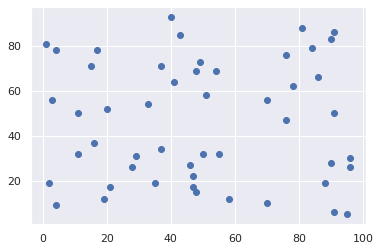

In [10]:
#create a random set of datapoints
import random
import matplotlib.pyplot as plt
import numpy as np
import seaborn; seaborn.set()

number_of_datapoints = 50
datapoints = np.random.randint(1,100,size=(number_of_datapoints,2))
#plto the points on scatter plot
plt.scatter(datapoints[:,0], datapoints[:,1])
plt.show()

**Step 1 : Find a point with the lowest y coordniate value, if there are more than one, then select the one with the lower x coordinate value. Call this point an Anchor point.**





In [3]:
anchor_point = datapoints[0]
for _, point in enumerate(datapoints):
    if point[1] < anchor_point[1]:
        anchor_point = point
    elif point[1] == anchor_point[1] and point[0] < anchor_point[0]:
        anchor_point = point
print(anchor_point)

[67  1]


**Step 2: Sort all the points based on the angle they make with the anchor point. If two points make the same angle with Anchor Point P, then sort it by distance with P**

In [4]:
from math import atan2

def polar_angle(p0, p1):
    y_span=p0[1]-p1[1]
    x_span=p0[0]-p1[0]
    return atan2(y_span,x_span)

# find the angle
datapoints_angles = []
origin = [0,0]
for _, point in enumerate(datapoints):
    datapoints_angles.append([point[0],point[1], polar_angle(anchor_point, point)])

datapoints_angles = np.array(datapoints_angles)    
datapoints_angles = datapoints_angles[datapoints_angles[:,2].argsort()]
sorted_datapoints =  datapoints_angles[:,(0,1)]

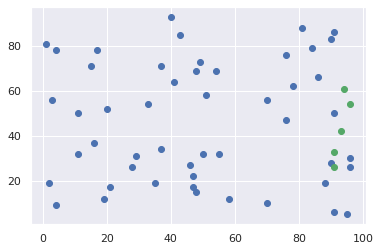

In [11]:
plt.scatter(datapoints[:,0], datapoints[:,1])
plt.scatter(sorted_datapoints[0:5,0], sorted_datapoints[0:5,1], c='g')
plt.show()

**step 3: initialize the convex hull with P and first element in the sorted array.**

In [6]:
convex_hull = [anchor_point, sorted_datapoints[0]]

**step 4: iterate over each point in the sorted array and see if the sequence of two points make clockwise or counter clockwise direction. if clockwise then reject the point and move on to the next point. Continue this till you reach the anchor point.**

In [7]:
def ccw(a, b, c):
    return (b[0] - a[0]) * (c[1] - a[1]) - (c[0] - a[0]) * (b[1] - a[1])

for point in sorted_datapoints[1:]:
    while ccw(convex_hull[-2],convex_hull[-1], point)<=0:
        del convex_hull[-1] # backtrack
    convex_hull.append(point)

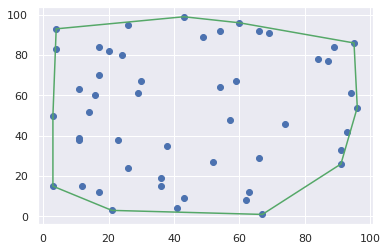

In [9]:
convex_hull = np.array(convex_hull)
plt.scatter(datapoints_angles[:,0], datapoints_angles[:,1])
plt.plot(convex_hull[:,0], convex_hull[:,1], c='g')
plt.show()